In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!pwd

/Users/guillermo/Documents/GitHub/prueba_pae/EDA


In [3]:
df_train = pd.read_csv("train.csv")
df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_test = pd.read_csv("test.csv")
df_test.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
hombreMedia = df_train[df_train["Genero"]=="Hombre"].mean()
mujeresMedia = df_train[df_train["Genero"]=="Mujer"].mean()
print("Media hombre")
print(hombreMedia)
print("Media mujer")
print(mujeresMedia)

Media hombre
Peso       84.455398
Altura    174.915330
dtype: float64
Media mujer
Peso       61.137895
Altura    161.304713
dtype: float64


In [5]:
print("La media de pesos es {} Kg".format(df_train["Peso"].mean()))

La media de pesos es 72.802475875 Kg


In [6]:
print("La media de altura es {} cm".format(df_train["Altura"].mean()))

La media de altura es 168.113424125 cm


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113f03690>,
      dtype=object)

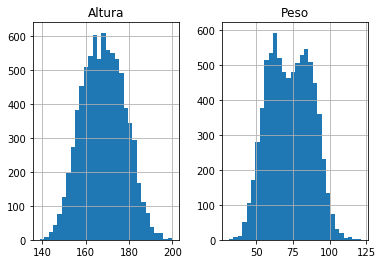

In [7]:
df_train.hist(bins=30)

Hombre


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150e5150>,
      dtype=object)

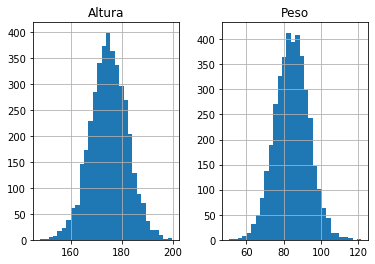

In [8]:
print("Hombre")
df_train[df_train["Genero"]=="Hombre"].hist(bins=30)

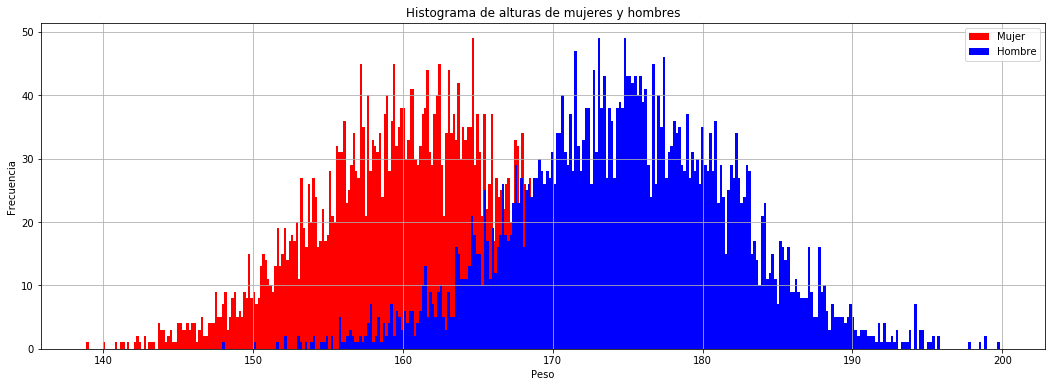

In [9]:
fig = plt.figure(figsize=[18,6])
axis=plt.gca()
df_train[df_train["Genero"]=="Mujer"]["Altura"].hist(bins=300,ax=axis,color='r',label="Mujer")
df_train[df_train["Genero"]=="Hombre"]["Altura"].hist(bins=300,ax=axis,color='b',label="Hombre")
plt.title("Histograma de alturas de mujeres y hombres")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

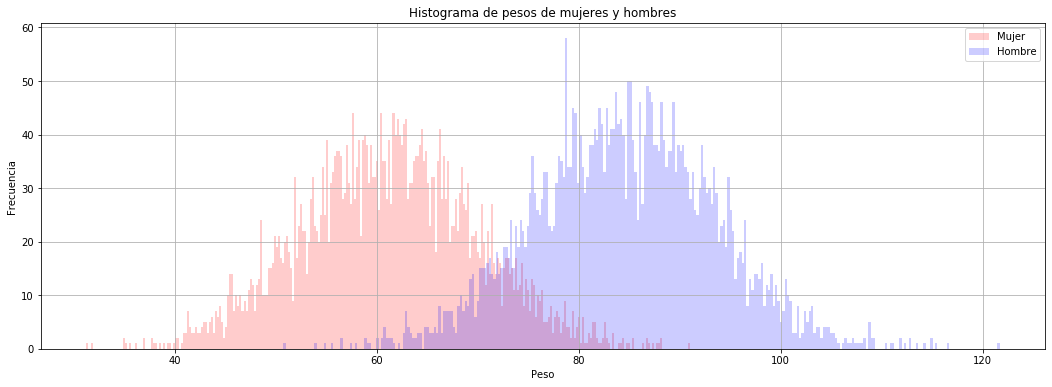

In [10]:
fig = plt.figure(figsize=[18,6])
axis=plt.gca()
df_train[df_train["Genero"]=="Mujer"]["Peso"].hist(bins=300,
                                                   ax=axis,
                                                   color='r',
                                                   label="Mujer",
           alpha=0.2)
df_train[df_train["Genero"]=="Hombre"]["Peso"].hist(bins=300,
                                                    ax=axis,
                                                    color='b',
                                                    label="Hombre",
           alpha=0.2)
plt.title("Histograma de pesos de mujeres y hombres")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

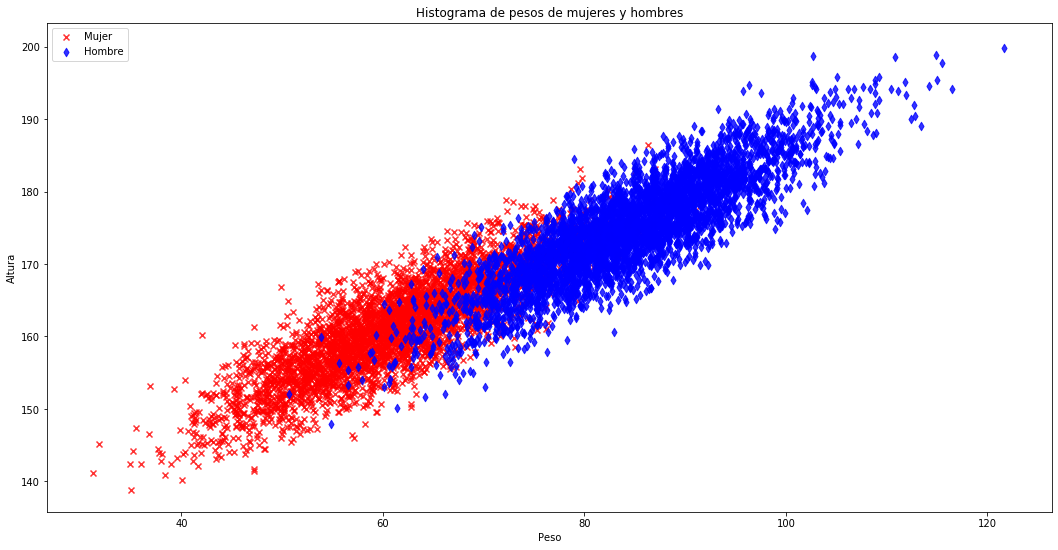

In [11]:
plt.figure(figsize=[18,9])
plt.scatter(df_train[df_train["Genero"]=="Mujer"]["Peso"],
            df_train[df_train["Genero"]=="Mujer"]["Altura"],
            color='r',
            label="Mujer",
           marker="x",
           alpha=0.8)
plt.scatter(df_train[df_train["Genero"]=="Hombre"]["Peso"],
            df_train[df_train["Genero"]=="Hombre"]["Altura"],
            color='b',
            label="Hombre",
           marker='d',
           alpha=0.8)
plt.title("Histograma de pesos de mujeres y hombres")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.legend()
plt.savefig("scatter_PA.png")
plt.show()

## Ejercicio histograma 2D grafico 3D

In [12]:
from sklearn.model_selection import train_test_split #para entrenar el modelo
from mpl_toolkits.mplot3d import Axes3D #para graficar 3d el modelo

In [117]:
df_train2, df_valid = train_test_split(df_train,test_size=0.30)
print("Largo lista de entrenamiento")
print(len(df_train2))
print("Largo lista de válidos")
print(len(df_valid))

Largo lista de entrenamiento
5600
Largo lista de válidos
2400


In [161]:
def printLog(arr,gender):
    #arr=[hist, xedges, yedges,indexA, indexP,validX,validY]
    print("/////-----------------------------------------------"+gender)
    print("histograma")
    print(arr[0])
    print("indices altura")
    print(arr[1])
    print("indices peso")
    print(arr[2])

In [192]:
def generate_model(data,bins,rango,gender,debug=True):
    #Get data models
    peso = data["Peso"].to_numpy()
    altura = data["Altura"].to_numpy()
    #histograma2d x=peso, y=altura
    histogram,xedges,yedges = np.histogram2d(altura,peso,bins=bins,range=rango)
    #Get index
    indexPeso = np.digitize(peso,yedges) 
    indexPeso[indexPeso<0]=0
    indexPeso[indexPeso>=bins[1]]=bins[1]-1
    
    indexAltura = np.digitize(altura,xedges)
    indexAltura[indexAltura<0]=0
    indexAltura[indexAltura>=bins[0]]=bins[0]-1

    print("Altura indice "+gender)
    print(indexAltura.max())
    print("Peso indice "+gender)
    print(indexPeso.max())
    
    if debug:
        printLog([histogram, indexAltura,indexPeso],gender)

    return [histogram,indexAltura,indexPeso]
    #return plt.hist2d(x,y,bins=[bins_a,bins_p])

In [208]:
def eval_model(modelM, modelH):
    print(len(modelM[0]))    
    print(len(modelH[0]))
    prediction = modelM[0][list(modelM[1]),list(modelM[2])] > modelH[0][list(modelH[1]),list(modelH[2])]
    prediction = prediction == (df_valid["Genero"]=="Mujer")
    return sum(prediction/len(prediction))

In [209]:
#def train and validation model by gender
trainM = df_train2[df_train2["Genero"]=="Mujer"]
trainH = df_train2[df_train2["Genero"]=="Hombre"]
#preset bins
binsMin = [10,10]
binsMed = [150,150]
binsMax = [300,300]
#preset rango
rango = [[df_train2["Altura"].min(),df_train2["Altura"].max()],
         [df_train2["Peso"].min(),df_train2["Peso"].max()]]
#Eval bin min
retMinM = generate_model(trainM,binsMin,rango,"Mujeres",False)
retMinH = generate_model(trainH,binsMin,rango,"Hombres",False)

#predictions
#ERROR operands could not be broadcast together with shapes (2793,) (2807,)
prediction = eval_model(retMinM, retMinH)
print(prediction)
#Eval bin media
#retM = eval_model(trainM,validM,binsA,binsP,"Mujeres",False)
#retH = eval_model(trainH,validH,binsA,binsP,"Hombres",False)
#Eval bin max
#retMaxM = eval_model(trainM,validM,binsMaxA,binsMaxP,"Mujeres",False)
#retMaxH = eval_model(trainH,validH,binsMaxA,binsMaxP,"Hombres",False)

Altura indice Mujeres
8
Peso indice Mujeres
7
Altura indice Hombres
9
Peso indice Hombres
9
10
10


ValueError: operands could not be broadcast together with shapes (2793,) (2807,) 

In [202]:
## Graficamos
def chart3d(arr):
    hist = arr[0]
    xedges = arr[1]
    yedges = arr[2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')#1,1,1 one dim matriz
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='max')
    plt.show()

## Minima

In [203]:
#Por indices de peso
chart3d(retMinM[7])
chart3d(retMinH[7])

IndexError: list index out of range

## Media

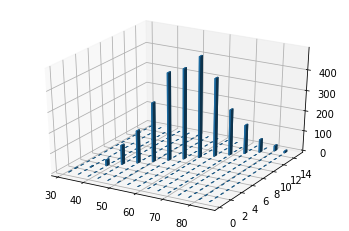

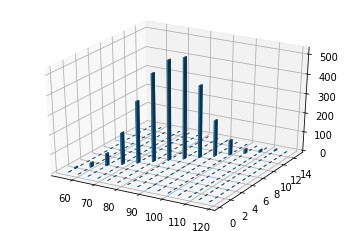

In [204]:
#Por indices de peso
chart3d(retM[7])
chart3d(retH[7])

## Máxima

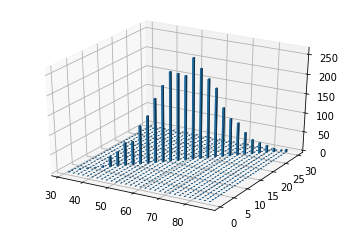

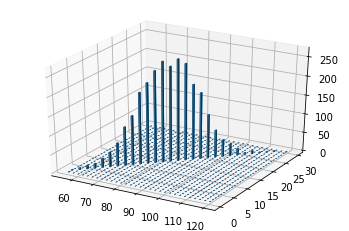

In [205]:
#Por indices de peso
chart3d(retMaxM[7])
chart3d(retMaxH[7])